In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directory containing your images
train_dir = '/kaggle/input/gender-detection-and-classification-image-dataset/train'
validation_dir = '/kaggle/input/gender-detection-and-classification-image-dataset/test'



img_width, img_height = 224,224
batch_size = 32

# Create image data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode='binary')



2024-05-03 09:47:33.977035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-03 09:47:33.977085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-03 09:47:33.978573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [2]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10, validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size)

# Calculate accuracy
accuracy = model.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/6 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.7118 

I0000 00:00:1714729691.084101    3103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1714729691.099992    3103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5067 - loss: 0.7124  

W0000 00:00:1714729712.083683    3104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6/6 ━━━━━━━━━━━━━━━━━━━━ 52s 5s/step - accuracy: 0.5073 - loss: 0.7116 - val_accuracy: 0.4844 - val_loss: 0.6931
Epoch 2/10
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.4062 - loss: 0.6942

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 830ms/step - accuracy: 0.4062 - loss: 0.6942 - val_accuracy: 0.7500 - val_loss: 0.6924
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6012 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6928
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 209ms/step - accuracy: 0.4375 - loss: 0.6943 - val_accuracy: 0.6875 - val_loss: 0.6910
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6495 - loss: 0.6920 - val_accuracy: 0.6250 - val_loss: 0.6918
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.5938 - loss: 0.6900 - val_accuracy: 0.6250 - val_loss: 0.6912
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.6292 - loss: 0.6892 - val_accuracy: 0.5625 - val_loss: 0.6893
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.6429 - loss: 0.6851 - val_accuracy: 0.3125 - val_loss: 0.6944
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 975ms/step - accuracy: 0.7656 - loss: 0.6777 - val_accuracy: 0.5156 - val_loss: 0.7277
Epoch 10

In [3]:
    model2 = Sequential()


    model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Conv2D(128, (3,3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Conv2D(256, (3,3),  activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    model2.add(Conv2D(512, (3,3), activation='relu'))
    model2.add(MaxPooling2D((2, 2)))
    

    # Flattening tensors
    model2.add(Flatten())

    # Fully-Connected Layers
    model2.add(Dense(64, activation='relu'))
    

    # Output Layer
    model2.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model2.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10, validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size)

# Calculate accuracy

accuracy = model2.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.4193 - loss: 1.2403 - val_accuracy: 0.5156 - val_loss: 0.6935
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 575ms/step - accuracy: 0.4643 - loss: 0.7001 - val_accuracy: 0.4375 - val_loss: 0.6986
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4189 - loss: 0.6965 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.4688 - loss: 0.6930 - val_accuracy: 0.5625 - val_loss: 0.6930
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4701 - loss: 0.6935 - val_accuracy: 0.5312 - val_loss: 0.6931
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.6562 - loss: 0.6927 - val_accuracy: 0.5625 - val_loss: 0.6924
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.5236 - loss: 0.6932 - val_accuracy: 0.5312 - val_loss: 0.6926
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - accuracy: 0.5625 - loss: 0.6929 - val_accuracy: 0.3125 - val_loss: 0.6932

In [4]:
    model3 = Sequential()

    model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(64, (3,3), activation='relu'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(128, (3,3),  activation='relu'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(256, (3,3), activation='relu'))
    model3.add(MaxPooling2D((2, 2)))
    

    # Flattening tensors
    model3.add(Flatten())

    # Fully-Connected Layers
    model3.add(Dense(30, activation='sigmoid'))
    

    # Output Layer
    model3.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model3.fit(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=10, validation_data=validation_generator, validation_steps=validation_generator.samples // batch_size)

# Calculate accuracy
accuracy = model3.evaluate(validation_generator)
print("Accuracy: %.2f%%" % (accuracy[1] * 100))

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.5265 - loss: 0.7191 - val_accuracy: 0.5312 - val_loss: 0.6959
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 681ms/step - accuracy: 0.5312 - loss: 0.6957 - val_accuracy: 0.3750 - val_loss: 0.7346
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 956ms/step - accuracy: 0.5124 - loss: 0.6958 - val_accuracy: 0.5156 - val_loss: 0.6918
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.5000 - loss: 0.6986 - val_accuracy: 0.4375 - val_loss: 0.7096
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4465 - loss: 0.7029 - val_accuracy: 0.4531 - val_loss: 0.7052
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.4688 - loss: 0.6999 - val_accuracy: 0.6875 - val_loss: 0.6651
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.5105 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6897
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - accuracy: 0.4375 - loss: 0.6962 - val_accuracy: 0.5625 - val_loss: 0.69

In [9]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print(f"Training Accuracy: {train_accuracy[-1]*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy[-1]*100:.2f}%")


Training Accuracy: 46.88%
Validation Accuracy: 43.75%


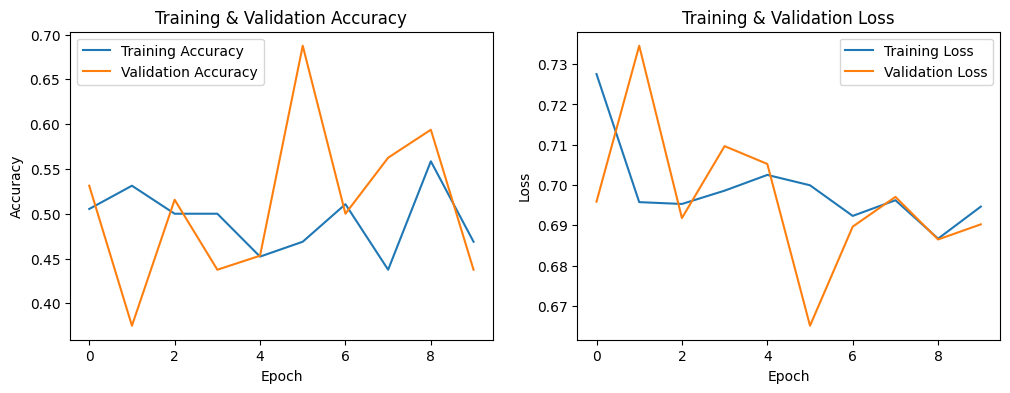

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
